In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# reading file data
rawdata=open("/content/drive/MyDrive/NLP/SMSSpamCollection.tsv").read()
(rawdata[0:500])

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [3]:
# replace all \t with \n and split data into list with \n
datasplit=rawdata.replace('\t','\n').split('\n')
datasplit[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [4]:
label_list=datasplit[0::2]
body_list=datasplit[1::2]
print(label_list[:10])
print(body_list[:10])

['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 11 months or more? U R entitled to Upd

In [5]:
print(len(label_list))
print(len(body_list))

5571
5570


In [6]:
# make a dataframe with label and body for this import pandas
import pandas as pd
df=pd.DataFrame({
    "label":label_list[0:-1],
    "body":body_list
})
df.head()

,label,body
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [12]:
# also we can make dataframe by read_csv
df1=pd.read_csv("/content/drive/MyDrive/NLP/SMSSpamCollection.tsv",sep='\t',header=None)
# to add coloums to dataframe
df1.columns=["label", "body_text"]
df1.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [13]:
# shape of data
print("dataframe has {} rows and {} columns".format(len(df1),len(df1.columns)))

dataframe has 5568 rows and 2 columns


In [9]:
# number of spam/ham
print("dataframe has {} spam and {} ham out of {}".format(len(df1[df1["label"]=="spam"]),len(df1[df1["label"]=="ham"]),len(df1)))

dataframe has 746 spam and 4822 ham out of 5568


In [14]:
# number of null values
print("label has {} null values".format(df1['label'].isnull().sum()))
print("text has {} null values".format(df1['body_text'].isnull().sum()))
df1.isnull()

label has 0 null values
text has 0 null values


,label,body_text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5563,False,False
5564,False,False
5565,False,False
5566,False,False


In [15]:
import string
# string library has punctuations in it 
string.punctuation

# defining a function to remove a punctuation
def remove_punc(text):
  text_nopunct="".join([char for char in text if char not in string.punctuation])
  return text_nopunct

df1["text_nopunct"]=df1['body_text'].apply(lambda x:remove_punc(x))
df1.head()

,label,body_text,text_nopunct
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [16]:
import re
def tokenize(text):
  tokens=re.split('\W+',text)
  return tokens

df1['tokenized_data']=df1['text_nopunct'].apply(lambda x:tokenize(x.lower()))

df1.head()

,label,body_text,text_nopunct,tokenized_data
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [17]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
# print(stopword)
def remove_stopwords(token_list):
  nostop=[word for word in token_list if word not in stopword]
  return nostop

df1['text_nostop']=df1['tokenized_data'].apply(lambda x:remove_stopwords(x))
df1.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,label,body_text,text_nopunct,tokenized_data,text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [18]:
# importing porter stemmer for stemming operation
ps=nltk.PorterStemmer() 
dir(ps)       
# dir will display all the methods used by ps 

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [19]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


In [20]:
def stemming(nostop_list):
  text=[ps.stem(word) for word in nostop_list]
  return text

df1['stemmed_words']=df1['text_nostop'].apply(lambda x:stemming(x))

df1.head()

,label,body_text,text_nopunct,tokenized_data,text_nostop,stemmed_words
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [21]:
wn=nltk.WordNetLemmatizer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [22]:
print(ps.stem('goose'))
print(ps.stem('geese'))
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goos
gees
goose
goose


In [23]:
def lemmatizing(nostop_list):
  text=[wn.lemmatize(word) for word in nostop_list]
  return text

df1['lemmatized_list']=df1['text_nostop'].apply(lambda x:lemmatizing(x))

df1.head()

,label,body_text,text_nopunct,tokenized_data,text_nostop,stemmed_words,lemmatized_list
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


In [24]:
# cleaning operations all in one
def clean_text(text):
  text="".join([char for char in text if char not in string.punctuation])
  tokens= re.split('\W+',text)
  text=[ps.stem(word) for word in tokens if word not in stopword]
  return text


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
Cv= CountVectorizer(analyzer=clean_text)

In [26]:
X_count=Cv.fit_transform(df['body'])
print(X_count.shape)
print(Cv.get_feature_names())

(5570, 8337)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
# working on sample data
df_sample=df[:20]
Cv2= CountVectorizer(analyzer=clean_text)
X_count_sample=Cv2.fit_transform(df_sample['body'])
print(X_count_sample.shape)
print(Cv2.get_feature_names())

 # X_count_sample is a sparse matrix -- Sparse matrix is a matrix with most entries as 0.

(20, 221)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'A', 'As', 'Co', 'Eh', 'FA', 'HL', 'He', 'I', 'Im', 'Is', 'No', 'ON', 'Oh', 'R', 'So', 'TC', 'To', 'U', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'england', 'enough', 'entitl', 'entri', 'even', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'from', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'had', 'have', 'help', 'home', 'hour', 'httpwap', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
# so keeping most 0 as it is make it inefficient so we will convert them to array and then to dataframe
x_count_df= pd.DataFrame(X_count_sample.toarray())
x_count_df.columns=Cv2.get_feature_names()
x_count_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,2,20000,2005,21st,3,4,4403ldnw1a7rw18,4txtú120,6day,81010,87077,87121,87575,9,900,A,As,Co,Eh,FA,HL,He,I,Im,Is,No,ON,Oh,R,So,...,though,time,tkt,today,tonight,treat,tri,trywal,tsandc,txt,u,updat,ur,urgent,use,usf,v,valid,valu,vettam,want,wap,watch,way,week,wet,will,win,winner,with,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**N-Gram** Similar as Count vectorization but instead of column representing single term they represent all combinations of adjacent words of length n of your text n=2=bigram n=3=trigram n=4=four-gram for example= 'nlp is an interesting topic' for bigram = ['nlp is', 'is an', 'an interesting','interesting topic'] for trigram= ['nlp is an', 'is an interesting', 'an interesting topic']

In [31]:
def clean_text(text):
  text="".join([char.lower() for char in text if char not in string.punctuation])
  tokens= re.split('\W+',text)
  text=" ".join([ps.stem(word) for word in tokens if word not in stopword])
  return text

df['cleaned_text']=df['body'].apply(lambda x:clean_text(x))
df.head()

,label,body,cleaned_text
0,ham,I've been searching for the right words to tha...,ive search right word thank breather promis wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [32]:
n_gram_vect= CountVectorizer(ngram_range=(2,2))
X_cnt=n_gram_vect.fit_transform(df['cleaned_text'])
X_cnt.shape

(5570, 31271)

In [33]:
# working on sample data
df_sample=df[0:20]
n_gram_sample=CountVectorizer(ngram_range=(2,2))
x_cnt_sample=n_gram_sample.fit_transform(df_sample['cleaned_text'])
print(x_cnt_sample.shape)
print(n_gram_sample.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
# Converting row data into datagram
ngram_df=pd.DataFrame(x_cnt_sample.toarray())
ngram_df.columns=n_gram_sample.get_feature_names()
ngram_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,4txtú120 poboxox36504w45wq,6day 16,81010 tc,87077 eg,87077 trywal,87121 receiv,87575 cost,900 prize,aft finish,aid patent,anymor tonight,appli 08452810075over18,appli repli,ard smth,around though,bless time,breather promis,brother like,call 09061701461,call mobil,caller press,callertun caller,camera free,cash 100,chanc win,claim 81010,claim call,claim code,click httpwap,click wap,...,text fa,thank breather,think goe,tkt 21st,tonight ive,treat like,tri month,trywal scotland,tsandc appli,txt csh11,txt messag,txt ratetc,txt ur,txt word,updat co,updat latest,ur lunch,ur nation,urgent week,use credit,usf live,valid 12,valu network,vettam set,want talk,wap link,way feel,way gota,week free,win cash,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Tfid vectorization

In [35]:
# cleaning operations all in one
def clean_text(text):
  text="".join([char for char in text if char not in string.punctuation])
  tokens= re.split('\W+',text)
  text=[ps.stem(word) for word in tokens if word not in stopword]
  return text

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect= TfidfVectorizer(analyzer=clean_text)
tf_data=tf_vect.fit_transform(df['body'])
tf_data.shape

tf_df=pd.DataFrame(tf_data.toarray())
tf_df.columns=tf_vect.get_feature_names()
tf_df.head(10)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourself,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,Ü,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
textt="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

tf_data=tf_vect.transform([textt])
# print(tf_data.shape)

tftext=pd.DataFrame(tf_data.toarray())
tftext.columns=tf_vect.get_feature_names()
# print(tf_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Feature Engineering** 
Creating a feature:

In [38]:
#adding a length feature
df2=pd.read_csv("/content/drive/MyDrive/NLP/SMSSpamCollection.tsv",sep='\t',header=None)
# to add coloums to dataframe
df2.columns=["label", "body_text"]
df2.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [39]:
df2['body_len']=df2['body_text'].apply(lambda x:len(x)-x.count(" "))
df2.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [40]:
#creating feature for % of text that is punctuation
def count_punct(text):
  count=sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")),3)*100


In [41]:
tftext['punct%']=count_punct(textt)
tftext['body_len']=(len(textt)-textt.count(" "))

In [42]:
df2['punct%']=df2['body_text'].apply(lambda x:count_punct(x))

df2.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [43]:
# visualizing features
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np

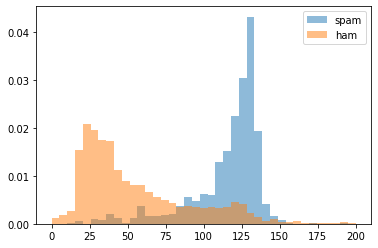

In [44]:
bins=np.linspace(0,200,40)
plt.hist(df2[df2['label']=='spam']['body_len'],bins, density=True,alpha=0.5,label='spam')
plt.hist(df2[df2['label']=='ham']['body_len'],bins,alpha=0.5, label='ham',density=True)
plt.legend(loc='upper right')
plt.show()

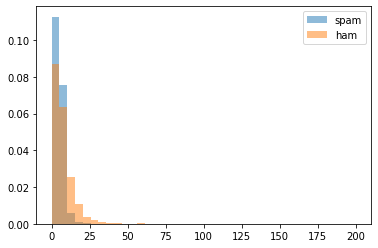

In [45]:
bins=np.linspace(0,200,40)
plt.hist(df2[df2['label']=='spam']['punct%'],bins, density=True,alpha=0.5,label='spam')
plt.hist(df2[df2['label']=='ham']['punct%'],bins,alpha=0.5, label='ham',density=True)
plt.legend(loc='upper right')
plt.show()

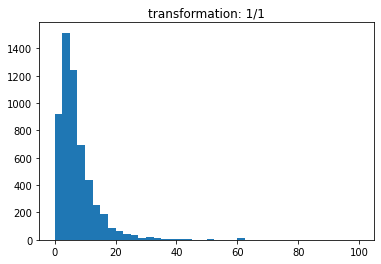

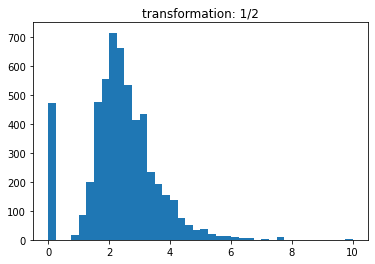

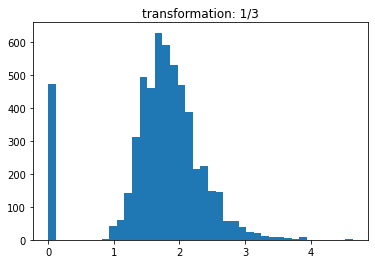

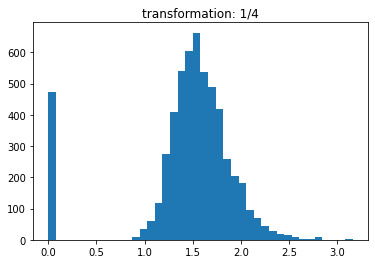

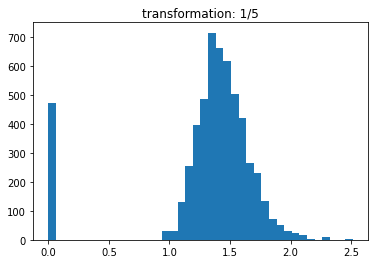

In [46]:
# transformation
for i in [1,2,3,4,5]:
  plt.hist(df2['punct%']**(1/i),bins=40)
  plt.title('transformation: 1/{}'.format(str(i)))
  plt.show()

In [47]:
#concating tfid feature and created features
x_feature=pd.concat([df2['body_len'],df2['punct%'],tf_df],axis=1)[:-2]
x_feature.head(20)

,body_len,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,...,yourself,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,Ü,é,ü,üll,〨ud
0,160.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,128.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,49.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,62.0,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,28.0,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,135.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,132.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,126.0,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,89.0,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,111.0,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


**Building Random Forest Model**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
rf=RandomForestClassifier(n_jobs=-1)

k_fold=KFold(n_splits=5)
cross_val_score(rf, x_feature, df1['label'], cv=k_fold, scoring='accuracy',n_jobs=-1)

array([0.97486535, 0.97755835, 0.97217235, 0.96316262, 0.90566038])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [50]:
x_train, x_test,y_train,y_test=train_test_split(x_feature,df1['label'], test_size=0.2)

In [51]:
rf1=RandomForestClassifier(n_estimators=50, max_depth=25,n_jobs=-1)

rf_model= rf1.fit(x_train,y_train)

# sorted(zip(rf_model.feature_importances_, x_train.columns), reverse=True)[0:10]

In [52]:
# print(x_test)
y_pred=rf_model.predict(x_test)

prec,recall,fscore,support=score(y_test,y_pred, pos_label='spam', average='binary')

print("Precision: {} recall: {} fscore: {} Accuracy: {}".format((round(prec,3)*100),(round(recall,3)*100), (round(fscore,3)*100),round((y_pred==y_test).sum()/len(y_pred),3)*100))

Precision: 93.30000000000001 recall: 56.39999999999999 fscore: 70.3 Accuracy: 93.60000000000001


In [53]:
print(rf_model.predict(tftext))

['ham']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


**Random Forest with Grid search Grid-Search**--> Exhaustively search all parameter combinations in given grid for detection of best model

Cross Validation --> Divide a dataset into a k subsets and repeat the holdout method k times where different subset is used as the holdout set in each iteration

In [54]:
def est_model(n_est, depth):
  rf2=RandomForestClassifier(n_estimators=n_est, max_depth=depth,n_jobs=-1)
  rf_model= rf1.fit(x_train,y_train)
  y_pred=rf_model.predict(x_test)

  prec,recall,fscore,support=score(y_test,y_pred, pos_label='spam', average='binary')

  print("For est {} depth {} Precision: {} recall: {} fscore: {} Accuracy: {} ".format(n_est,depth,(round(prec,3)*100),(round(recall,3)*100), (round(fscore,3)*100), round((y_pred==y_test).sum()/len(y_pred),3)*100))


In [56]:
for est in [10,50,100]:
  for depth in [10,20,30,None]:
    est_model(est,depth)

For est 10 depth 10 Precision: 94.5 recall: 57.699999999999996 fscore: 71.7 Accuracy: 93.89999999999999 
For est 10 depth 20 Precision: 94.1 recall: 53.7 fscore: 68.4 Accuracy: 93.4 
For est 10 depth 30 Precision: 95.19999999999999 recall: 53.7 fscore: 68.7 Accuracy: 93.4 
For est 10 depth None Precision: 94.0 recall: 52.300000000000004 fscore: 67.2 Accuracy: 93.2 
For est 50 depth 10 Precision: 93.4 recall: 56.99999999999999 fscore: 70.8 Accuracy: 93.7 
For est 50 depth 20 Precision: 94.39999999999999 recall: 56.39999999999999 fscore: 70.6 Accuracy: 93.7 
For est 50 depth 30 Precision: 94.3 recall: 55.00000000000001 fscore: 69.5 Accuracy: 93.5 
For est 50 depth None Precision: 93.10000000000001 recall: 54.400000000000006 fscore: 68.60000000000001 Accuracy: 93.4 
For est 100 depth 10 Precision: 94.3 recall: 55.7 fscore: 70.0 Accuracy: 93.60000000000001 
For est 100 depth 20 Precision: 94.5 recall: 57.699999999999996 fscore: 71.7 Accuracy: 93.89999999999999 
For est 100 depth 30 Precisi

In [57]:
# Doing above steps using GridSearchCV
from sklearn.model_selection import GridSearchCV

r_f=RandomForestClassifier()
param={'n_estimators':[10,150,300], 'max_depth':[30,60,90,None]}
gs=GridSearchCV(r_f,param, cv=5,n_jobs=-1)
gs_fit=gs.fit(x_feature, df1['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,18.388369,0.966245,0.276086,0.012641,None,150,"{'max_depth': None, 'n_estimators': 150}",0.973968,0.975763,0.972172,0.968553,0.902965,0.958684,0.027962,1
11,33.817844,5.627400,0.374771,0.058102,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.973968,0.970377,0.965858,0.904762,0.958146,0.026906,2
8,31.587917,0.872051,0.396414,0.012646,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975763,0.977558,0.971275,0.962264,0.902965,0.957965,0.028005,3
7,16.011628,0.380347,0.255594,0.006236,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.972172,0.974865,0.967684,0.966757,0.905660,0.957428,0.026052,4
5,24.882301,0.574280,0.345432,0.015159,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.971275,0.973968,0.967684,0.961366,0.906559,0.956170,0.025162,5


In [60]:
from sklearn.model_selection import GridSearchCV

r_f=RandomForestClassifier()
param={'n_estimators':[10,150,300], 'max_depth':[30,60,90,None]}
gs=GridSearchCV(r_f,param, cv=5,n_jobs=-1)
gs_fit=gs.fit(x_feature, df1['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,33.477694,5.893257,0.375417,0.060079,None,300,"{'max_depth': None, 'n_estimators': 300}",0.973968,0.974865,0.972172,0.965858,0.904762,0.958325,0.026966,1
7,15.566220,0.406393,0.239327,0.004554,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.973968,0.975763,0.968582,0.966757,0.904762,0.957966,0.026808,2
8,30.720205,0.707020,0.367190,0.008695,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.974865,0.976661,0.971275,0.962264,0.903863,0.957786,0.027414,3
10,17.874342,1.029653,0.259865,0.006864,None,150,"{'max_depth': None, 'n_estimators': 150}",0.973968,0.974865,0.969479,0.963163,0.904762,0.957247,0.026568,4
4,12.218589,0.235147,0.219450,0.008257,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.970377,0.973070,0.968582,0.962264,0.906559,0.956170,0.025060,5


Exploring gradient boosting model with grid search

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=55, max_depth=17,learning_rate=1)
gb_model= gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
precgb,recallgb,fscoregb,supportgb=score(y_test,y_pred, pos_label='spam', average='binary')
print("For est {} depth {} learning_rate {} Precision: {} recall: {} fscore: {} Accuracy: {} ".format(55,17,1,(round(precgb,3)*100),(round(recallgb,3)*100), (round(fscoregb,3)*100), round((gb_pred==y_test).sum()/len(gb_pred),3)*100))


For est 55 depth 17 learning_rate 1 Precision: 93.30000000000001 recall: 56.39999999999999 fscore: 70.3 Accuracy: 94.89999999999999 


In [62]:
def gb_model_test(n_est, depth,lr):
  gb=GradientBoostingClassifier(n_estimators=n_est, max_depth=depth,learning_rate=lr)
  gb_model= gb.fit(x_train,y_train)
  y_pred=gb_model.predict(x_test)
  print(gb_model.predict(tftext))
  prec,recall,fscore,support=score(y_test,y_pred, pos_label='spam', average='binary')

  print("For est {} depth {} learning_rate {} Precision: {} recall: {} fscore: {} Accuracy: {} ".format(n_est,depth,lr,(round(prec,3)*100),(round(recall,3)*100), (round(fscore,3)*100), round((y_pred==y_test).sum()/len(y_pred),3)*100))

In [63]:
gb_model_test(55,17,1)

['ham']
For est 55 depth 17 learning_rate 1 Precision: 87.8 recall: 72.5 fscore: 79.4 Accuracy: 95.0 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [64]:
for est in [50,100,150]:
  for depth in [3,7,11,15]:
    for lr in [0.01,0.1,1]:
      gb_model_test(est,depth,lr)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['ham']
For est 50 depth 3 learning_rate 0.01 Precision: 0.0 recall: 0.0 fscore: 0.0 Accuracy: 86.6 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 3 learning_rate 0.1 Precision: 95.19999999999999 recall: 66.4 fscore: 78.3 Accuracy: 95.1 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 3 learning_rate 1 Precision: 88.3 recall: 71.1 fscore: 78.8 Accuracy: 94.89999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['ham']
For est 50 depth 7 learning_rate 0.01 Precision: 0.0 recall: 0.0 fscore: 0.0 Accuracy: 86.6 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 7 learning_rate 0.1 Precision: 96.39999999999999 recall: 72.5 fscore: 82.8 Accuracy: 96.0 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 7 learning_rate 1 Precision: 83.7 recall: 72.5 fscore: 77.7 Accuracy: 94.39999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 11 learning_rate 0.01 Precision: 100.0 recall: 0.7000000000000001 fscore: 1.3 Accuracy: 86.7 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 11 learning_rate 0.1 Precision: 91.4 recall: 71.1 fscore: 80.0 Accuracy: 95.19999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 11 learning_rate 1 Precision: 82.69999999999999 recall: 73.8 fscore: 78.0 Accuracy: 94.39999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['ham']
For est 50 depth 15 learning_rate 0.01 Precision: 0.0 recall: 0.0 fscore: 0.0 Accuracy: 86.6 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 15 learning_rate 0.1 Precision: 92.7 recall: 76.5 fscore: 83.8 Accuracy: 96.1 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 50 depth 15 learning_rate 1 Precision: 84.39999999999999 recall: 76.5 fscore: 80.30000000000001 Accuracy: 95.0 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 3 learning_rate 0.01 Precision: 95.7 recall: 44.3 fscore: 60.6 Accuracy: 92.30000000000001 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 3 learning_rate 0.1 Precision: 92.2 recall: 71.8 fscore: 80.80000000000001 Accuracy: 95.39999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 3 learning_rate 1 Precision: 82.19999999999999 recall: 71.1 fscore: 76.3 Accuracy: 94.1 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 7 learning_rate 0.01 Precision: 95.7 recall: 59.099999999999994 fscore: 73.0 Accuracy: 94.19999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 7 learning_rate 0.1 Precision: 95.7 recall: 74.5 fscore: 83.8 Accuracy: 96.1 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 7 learning_rate 1 Precision: 83.6 recall: 75.2 fscore: 79.2 Accuracy: 94.69999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 11 learning_rate 0.01 Precision: 95.0 recall: 64.4 fscore: 76.8 Accuracy: 94.8 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 11 learning_rate 0.1 Precision: 91.7 recall: 73.8 fscore: 81.8 Accuracy: 95.6 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 11 learning_rate 1 Precision: 84.7 recall: 74.5 fscore: 79.3 Accuracy: 94.8 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 15 learning_rate 0.01 Precision: 96.1 recall: 66.4 fscore: 78.60000000000001 Accuracy: 95.19999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 15 learning_rate 0.1 Precision: 92.5 recall: 74.5 fscore: 82.5 Accuracy: 95.8 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 100 depth 15 learning_rate 1 Precision: 87.0 recall: 76.5 fscore: 81.39999999999999 Accuracy: 95.3 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 3 learning_rate 0.01 Precision: 96.1 recall: 49.7 fscore: 65.5 Accuracy: 93.0 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 3 learning_rate 0.1 Precision: 94.69999999999999 recall: 72.5 fscore: 82.1 Accuracy: 95.8 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 3 learning_rate 1 Precision: 84.39999999999999 recall: 69.1 fscore: 76.0 Accuracy: 94.19999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 7 learning_rate 0.01 Precision: 96.0 recall: 65.10000000000001 fscore: 77.60000000000001 Accuracy: 95.0 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 7 learning_rate 0.1 Precision: 93.4 recall: 75.8 fscore: 83.7 Accuracy: 96.1 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 7 learning_rate 1 Precision: 87.6 recall: 71.1 fscore: 78.5 Accuracy: 94.8 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 11 learning_rate 0.01 Precision: 95.1 recall: 65.8 fscore: 77.8 Accuracy: 95.0 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 11 learning_rate 0.1 Precision: 92.5 recall: 74.5 fscore: 82.5 Accuracy: 95.8 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 11 learning_rate 1 Precision: 84.3 recall: 75.8 fscore: 79.9 Accuracy: 94.89999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 15 learning_rate 0.01 Precision: 93.7 recall: 69.8 fscore: 80.0 Accuracy: 95.3 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['ham']
For est 150 depth 15 learning_rate 0.1 Precision: 93.4 recall: 75.8 fscore: 83.7 Accuracy: 96.1 
['ham']
For est 150 depth 15 learning_rate 1 Precision: 86.9 recall: 75.8 fscore: 81.0 Accuracy: 95.19999999999999 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [65]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Importing metrics to evaluate our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [68]:
%%time
# Instantiating the K Nearest Neighbors model
KNN_model = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1)

# Fitting the Model
KNN_model.fit(x_train, y_train)

# Scoring the model on training data
t_score=KNN_model.score(x_train, y_train)

# Scoring the model on test data
test_score=KNN_model.score(x_test, y_test)
y_pred_knn=KNN_model.predict(x_test)
precknn,recallknn,fscoreknn,supportknn=score(y_test,y_pred_knn, pos_label='spam', average='binary')
print("for Decision tree we got {} Precision {} recall {} fscore {} Accuracy".format(precknn,recallknn,fscoreknn,round((y_pred_knn==y_test).sum()/len(y_pred_knn),3)*100))
print(KNN_model.predict(tftext))
print(f'The training score using a K Nearest Neighbors is: {t_score}')
print('\n')
print(f'The testing score using a K Nearest Neighbors is: {test_score}')
print('\n')
print('Time taken to run the model:')

for Decision tree we got 0.8157894736842105 Precision 0.4161073825503356 recall 0.5511111111111111 fscore 90.9 Accuracy
['ham']
The training score using a K Nearest Neighbors is: 0.9508307139649753


The testing score using a K Nearest Neighbors is: 0.9093357271095153


Time taken to run the model:
CPU times: user 31.9 s, sys: 1.05 s, total: 32.9 s
Wall time: 17.4 s


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [69]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
prec,recall,fscore,support=score(y_test,y_pred_dt, pos_label='spam', average='binary')
print(dt.predict(tftext))
print("for Decision tree we got {} Precision {} recall {} fscore {} Accuracy".format(prec,recall,fscore,round((y_pred_dt==y_test).sum()/len(y_pred_dt),3)*100))

['ham']
for Decision tree we got 0.912621359223301 Precision 0.6308724832214765 recall 0.746031746031746 fscore 94.3 Accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [70]:
# Nave bayes classifier
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred=nb.predict(x_test)
precnb,recallnb,fscorenb,supportnb=score(y_test,nb_pred, pos_label='spam', average='binary')
print("for nave bayes we got {} Precision {} recall {} fscore {} Accuracy".format(precnb,recallnb,fscorenb,round((nb_pred==y_test).sum()/len(nb_pred),3)*100))


for nave bayes we got 0.8787878787878788 Precision 0.38926174496644295 recall 0.5395348837209302 fscore 91.10000000000001 Accuracy


In [71]:
def text_prediction(text_data):
  tf_data=tf_vect.transform([text_data])
  # print(tf_data.shape)

  tftext=pd.DataFrame(tf_data.toarray())
  tftext.columns=tf_vect.get_feature_names()
  # print(tf_data)
  tftext['punct%']=count_punct(textt)
  tftext['body_len']=(len(textt)-textt.count(" "))
  return tftext

In [74]:
print("Enter your text for prediction")
text=input()
pred_text=text_prediction(text)
print("Random Forest prediction:- {}".format(rf_model.predict(pred_text)[0]))
print("KNN Model prediction:- {}".format(KNN_model.predict(pred_text)[0]))
print("Decision tree prediction:- {}".format(dt.predict(pred_text)[0]))
print("Gradient boosting prediction:- {}".format(gb_model.predict(pred_text)[0]))

Enter your text for prediction
Hello World!


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Random Forest prediction:- ham
KNN Model prediction:- ham
Decision tree prediction:- ham
Gradient boosting prediction:- ham


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
